# Importing Necessary Modules

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
pip install plotly --upgrade

In [2]:
import plotly.express as px

# Importing the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

# Data Dictionary
* **hotel**: The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.
* **is_canceled**: Value indicating if the booking was canceled (1) or not (0).
* **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
* **arrival_date_year**: 
Year of arrival date
* **arrival_date_month**: Month of arrival date with 12 categories: “January” to “December”
* **arrival_date_week_number**:Week number of the arrival date
* **arrival_date_day_of_month**: Day of the month of the arrival date
* **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
* **adults**: Number of adults
* **children**: Number of children
* **babies**: Number of babies
* **meal**: BB - Bed & Breakfast
* **country**: Country of origin
* **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
* **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
* **reserved_room_type**: Code of room type reserved.
* **assigned_room_type**: Code for the type of room assigned to the booking.Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
* **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS  until the moment of check-in or cancellation.
* **deposite_type**: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* **agent**: ID of the travel agency that made the booking.
* **company**: ID of the company/entity that made the booking or responsible for paying the booking. 
* **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.
* **customer_type**: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract  and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
* **adr**: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights).
* **required_car_parking_spaces**: Number of car parking spaces required by the customer.
* **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor).
* **reservation_status**: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
* **reservation_status_date**: Date at which the last status was set.



 



# Checking missing values

In [8]:
df.shape

(119390, 32)

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* obviously there are missing values in these features - country,agent,company

# Univariate analysis

In [10]:
def list_maker(my_list,datatype):
  '''
  custom function to create two groups for numerical features and categorical features
  '''
  df_col=list(df.columns)
  for i in df_col:
    if type(df[i][0])==datatype and i != 'reservation_status_date':
      my_list.append(i)


numerical_feat=list()
object_feat=list()

list_maker(object_feat,str)

list_maker(numerical_feat,np.int64)
list_maker(numerical_feat,np.float64)

In [11]:
object_feat,numerical_feat

(['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status'],
 ['is_canceled',
  'lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'days_in_waiting_list',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'children',
  'agent',
  'company',
  'adr'])

In [12]:
numerical_feat1= ['lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'days_in_waiting_list',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'children',
  'adr']

In [13]:
object_feat1= ['hotel',
  'arrival_date_month',
  'meal',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status']

In [14]:
def UVA_numeric(data, var_group):
  '''
  Univariate Analysis of numeric columns
  takes a group of variables(Integer and Float)
  and plot/print all the descriptives and properties along with KDE
  runs a loop: calculate all the descriptives of i(th) variable and plot/print it.
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 3), dpi=120)

  # looping over each feature
  for j ,i in enumerate(var_group):

    # calculating of descriptives of variables
    minm = data[i].min()
    maxm = data[i].max()
    ran = maxm - minm
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # calculation of points of inflection
    points = mean-st_dev, mean+st_dev

    #plotting the variables with every information
    plt.subplot(1, size, j+1)
    sns.kdeplot(data[i], shade=True)
    sns.scatterplot([minm, maxm], [0,0], color='blue', label='max/min')
    sns.scatterplot([mean], [0], color='green', label='mean')
    sns.scatterplot([median], [0], color='orange', label='median')
    sns.scatterplot(points, [0,0], color='pink', label='points of inflection')
    plt.xlabel(f'{i}')
    plt.ylabel('Density')
    plt.title(f'Point of Inflection={(round(points[0],2), round(points[1],2))}; range={round(ran,2)};\nskewness={round(skew,2)}; kurtosis={round(kurt,2)}; \nmean={round(mean,2)}; median={round(median,2)}')

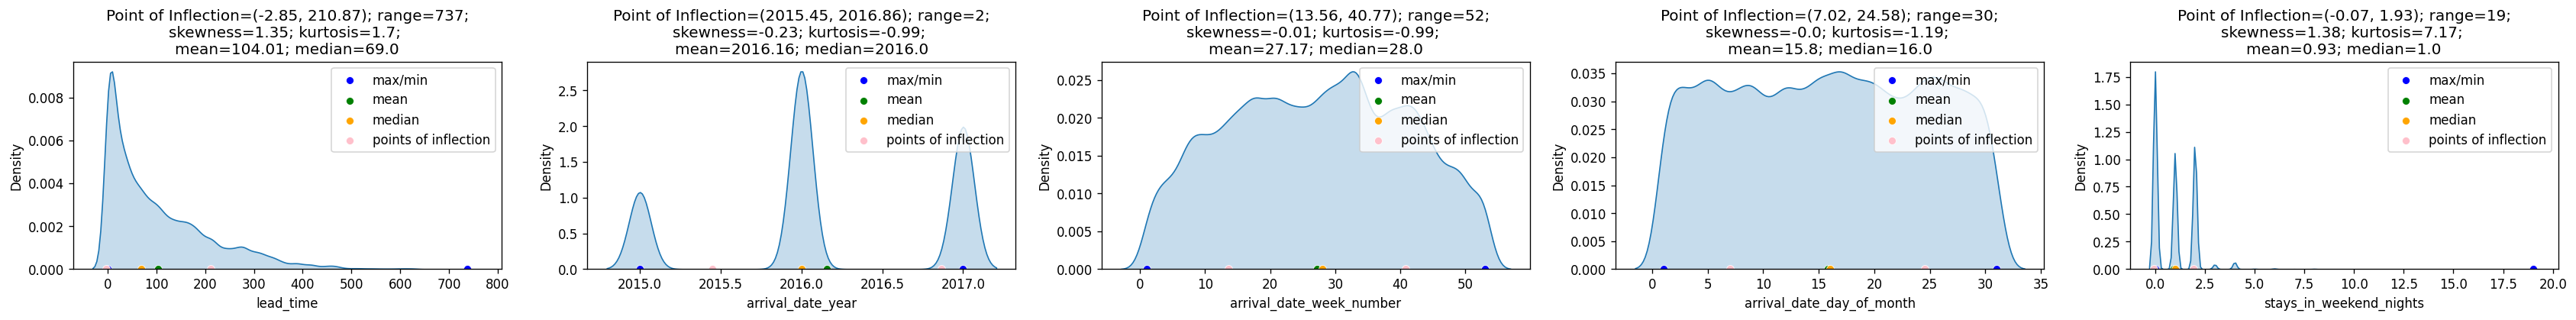

In [19]:
UVA_numeric(df,numerical_feat1[:5])

## SUMMARY - 
**lead_time** - From the graph we can see it is biased toward comparative small values. It has max_value 737. So It has outliers. The graph is right_skewed.

**arrival_date_year** - Busiest year was 2016.

**arrival_date_week_number** - maximum guests come between 10th to 41st week.Minimum guests come in winter.

**arrival_date_of_month** - Maximum guests come in between 15th and 20th of month.

**stays_in_weekend_nights** - according to the graph guests spend mostly 1 to 2 weekend nights.

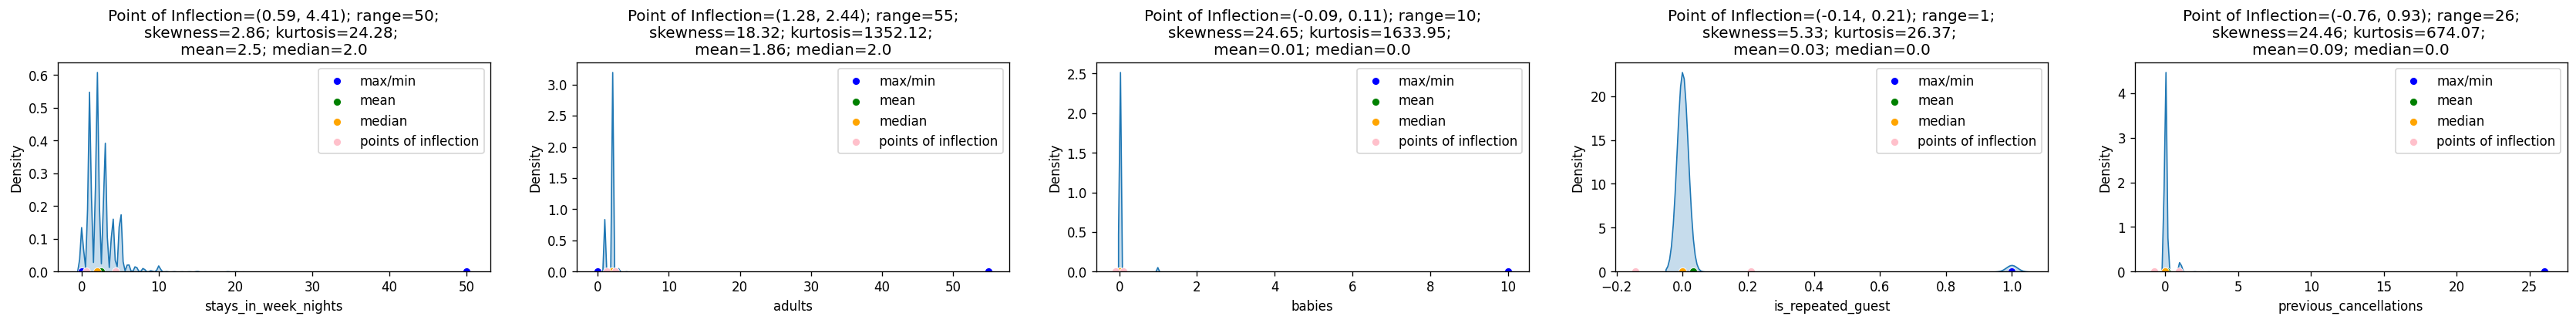

In [20]:
UVA_numeric(df,numerical_feat1[5:10])

## SUMMARY - 
**stays_in_week_nights** - according to the graph guests spend mostly 1 to 2 weekday nights. Here, the max value is 50. There are outliers.

**adults** - Mostly 1 to 2 adults come to the hotels.

**babies** - Generally babies don't come. Max number of babies here is 10.

**is_repeated_guest** - Guests do not come for the second time mostly.

**previous_cancellations** - Mostly there is not a history of previous cancellation.


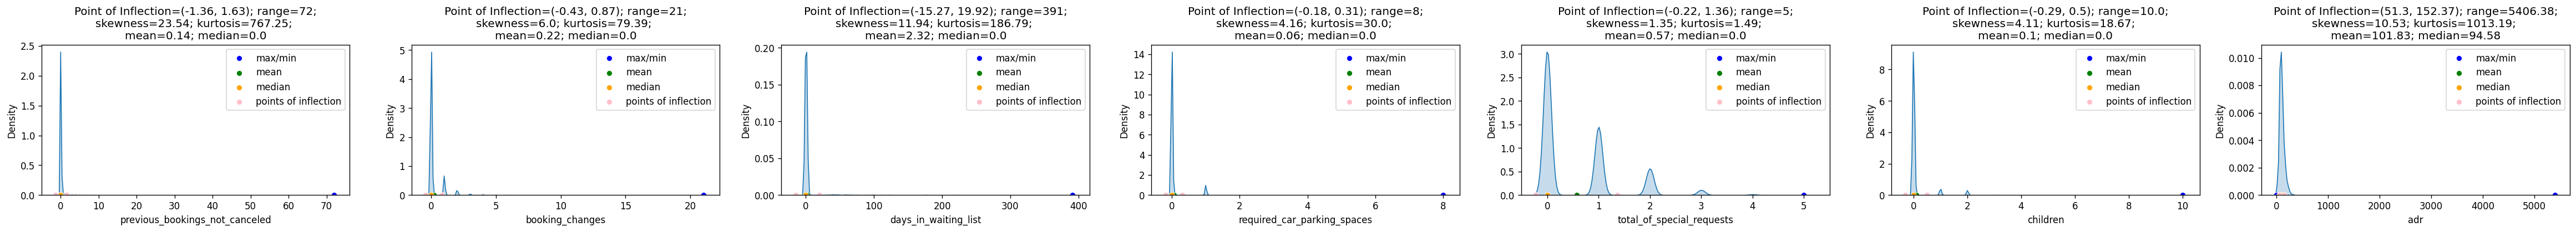

In [21]:
UVA_numeric(df,numerical_feat1[10:])

## SUMMARY -
**previous_bookings_not_canceled** - Number of previous bookings not canceled is mostly 0.

**booking_changes** - Booking changes does not occur much.

**days_in_waiting_list** - Mostly people does not have to wait .

**required_car_parking_spaces** - In general there is not any need of parking space . Often guests need 1 parking space and max is 8.

**total_no_special_requests** - Mostly the guests did not have specials request. sometimes one or two requests were made.

**children** - Mainly 1 or 2 children comes. and maximum is 10.

**adr** - Max average daily rate is 5406 . mean is 101.



In [22]:
# Custom Function for easy visualization and analysis of categorical values
def UVA_category(data, var_group):
  '''
  Univariate Analysis of Categorical Columns
  Takes a list of category and a DataFrame
  Prints/plots all value_counts and barplot
  '''
  #setting figsize
  size = len(var_group)
  plt.figure(figsize=(9*size, 5), dpi=120)

  for j, i in enumerate(var_group):
    #for counting the unique values
    norm_count = data[i].value_counts(normalize=True)
    n_uni = data[i].nunique()

    #plotting the variable with ebery information 
    plt.subplot(1, size, j+1)
    sns.barplot(norm_count, norm_count.index, order=norm_count.index)
    plt.xlabel(f'Fraction/percent', fontsize=20)
    plt.ylabel(f'{i}', fontsize=10)
    plt.title(f'n_uniques={n_uni}\nValue_counts={norm_count}')

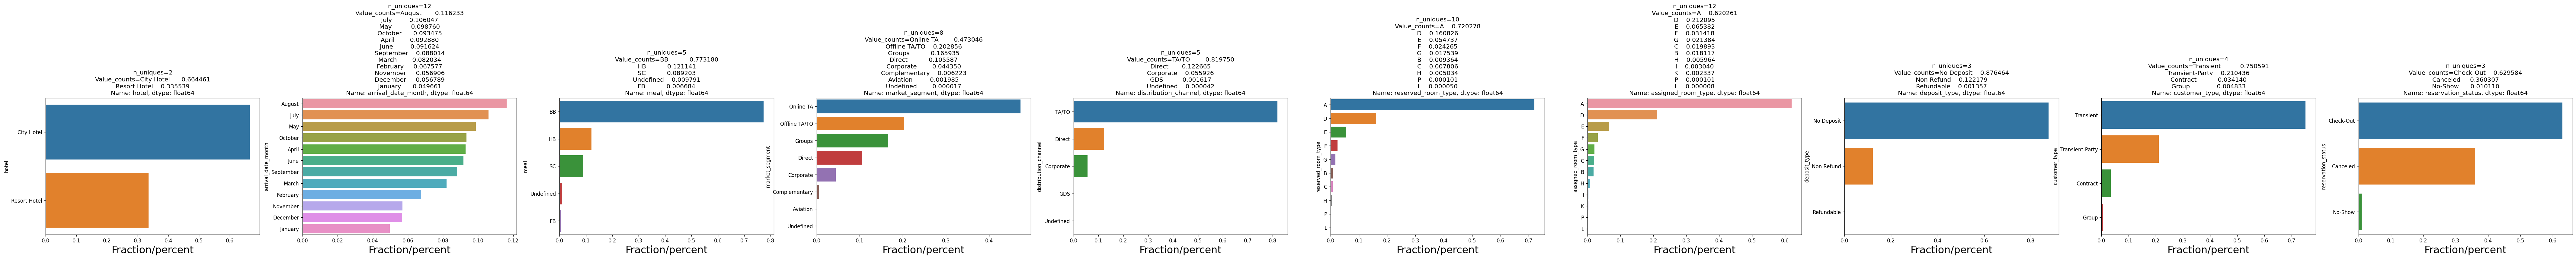

In [23]:
UVA_category(df,object_feat1[0:])

## SUMMARY
**Hotel** - City Hotel is busier than resort hotel

**arrival**-  Mostly guests arrive in the months of August, July, May. August is the busiest month.

**meal**- BB is mostly in demand among customers.

**market_segment**- Online travel agents are mostly used by the customers.

**distribution_channel**- Mostly the bookings are done through TA or TO.

**reserved_room_type**- type A room is mostly reserved.

**assigned_room_type**- Customers mostly get type A room. So we can say customers can obtain their reserved rooms most of the time.

**deposit_type**- Usually no deposits are made.

**customer_type**- Mostly the bookings are transient.

**reservation_status**- Number of guests who have checked in and already departed is maximum here.

## Analyzing the data having the influence of the outliers

In [24]:
def UVA_outliers(data, var_group, include_outlier=True):

  '''
  Univariate Analysis of outliers
  Takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) varibales and ploot/print it
  data: DataFrame object from which to plot from
  var_group: list of subject columns
  include_outliers(bool): whether to include outliers or not, default = True 
  '''

  size = len(var_group)
  plt.figure(figsize=(7*size, 4), dpi=100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variables
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)

    #calculating descriptives of variables
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier:

      #plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i],orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 2nd, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')

    else:

      #replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      #plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel(f'{i}')
      plt.title(f'With outliers\nIQR = {round(IQR,2)}; Median = {round(med,2)}; \n 1st, 3rd Quartile={(round(quant25,2), round(quant75,2))},\nOutlier(low/high)={(outlier_low,outlier_high)}')


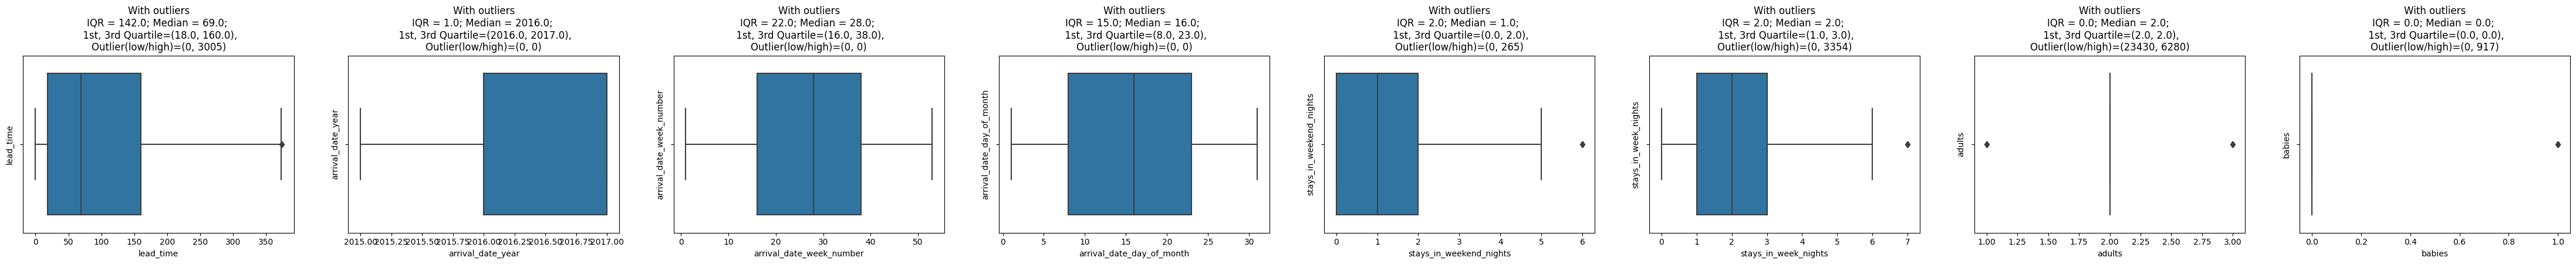

In [25]:
UVA_outliers(df, numerical_feat1[:8], False)

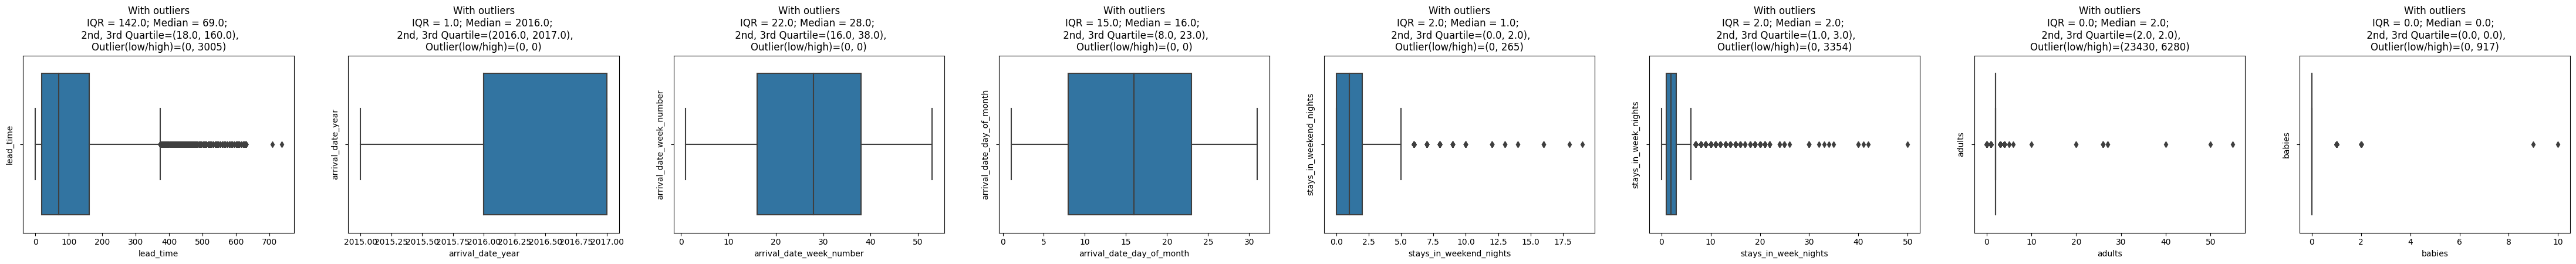

In [26]:
UVA_outliers(df, numerical_feat1[:8])

## Bivariate Analysis

In [27]:
numerical_df = df[numerical_feat1]
numerical_df.head()

lead_time  arrival_date_year  arrival_date_week_number  \
0        342               2015                        27   
1        737               2015                        27   
2          7               2015                        27   
3         13               2015                        27   
4         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  babies  is_repeated_guest  previous_cancellations  \
0       2       0                  0                       0   
1       2       0                  0                       0   
2       1       0                  0                       0   
3       1       0                  0                       0   
4       2       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

   required_car_parking_spaces  total_of_special_requests  children   adr  
0                            0                          0       0.0   0.0  
1                            0                          0       0.0   0.0  
2                            0                          0       0.0  75.0  
3                            0                          0       0.0  75.0  
4                            0                          1       0.0  98.0

### Correlation Matrix

In [ ]:
correlation = numerical_df.corr()
correlation

lead_time  ...       adr
lead_time                        1.000000  ... -0.063077
arrival_date_year                0.040142  ...  0.197580
arrival_date_week_number         0.126871  ...  0.075791
arrival_date_day_of_month        0.002268  ...  0.030245
stays_in_weekend_nights          0.085671  ...  0.049342
stays_in_week_nights             0.165799  ...  0.065237
adults                           0.119519  ...  0.230641
babies                          -0.020915  ...  0.029186
is_repeated_guest               -0.124410  ... -0.134314
previous_cancellations           0.086042  ... -0.065646
previous_bookings_not_canceled  -0.073548  ... -0.072144
booking_changes                  0.000149  ...  0.019618
days_in_waiting_list             0.170084  ... -0.040756
required_car_parking_spaces     -0.116451  ...  0.056628
total_of_special_requests       -0.095712  ...  0.172185
children                        -0.037622  ...  0.324854
adr                             -0.063077  ...  1.000000

[17 rows x 17 columns]

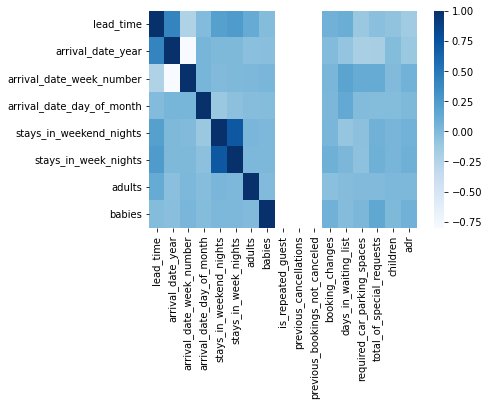

In [ ]:
sns.heatmap(correlation[:8],annot=False,cmap='Blues')

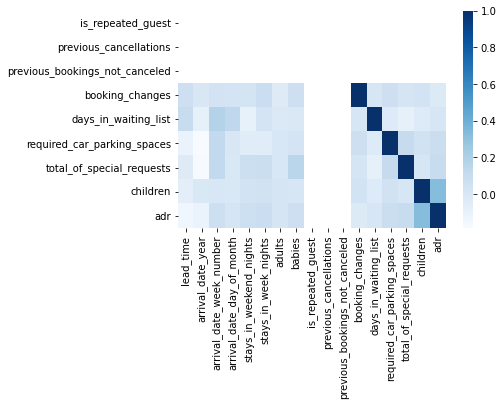

In [ ]:
sns.heatmap(correlation[8:],annot=False,cmap='Blues')

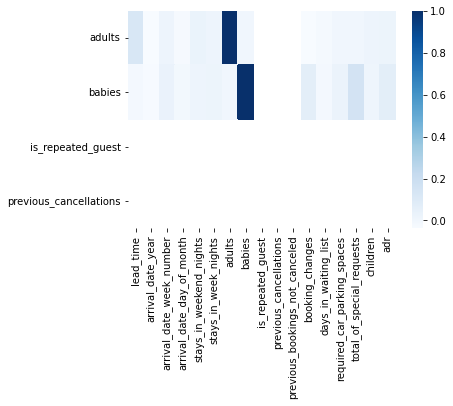

In [ ]:
sns.heatmap(correlation[6:10],annot=False,cmap='Blues')

In [28]:
numerical_df['is_canceled'] = df['is_canceled']
numerical_df['is_canceled'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

### In this section, we'll observe the pairwise relation between any arbitrary two features.

In [ ]:
numerical_df.dropna(axis=0, how='any', inplace=True)
numerical_df.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
children                          0
adr                               0
is_canceled                       0
dtype: int64

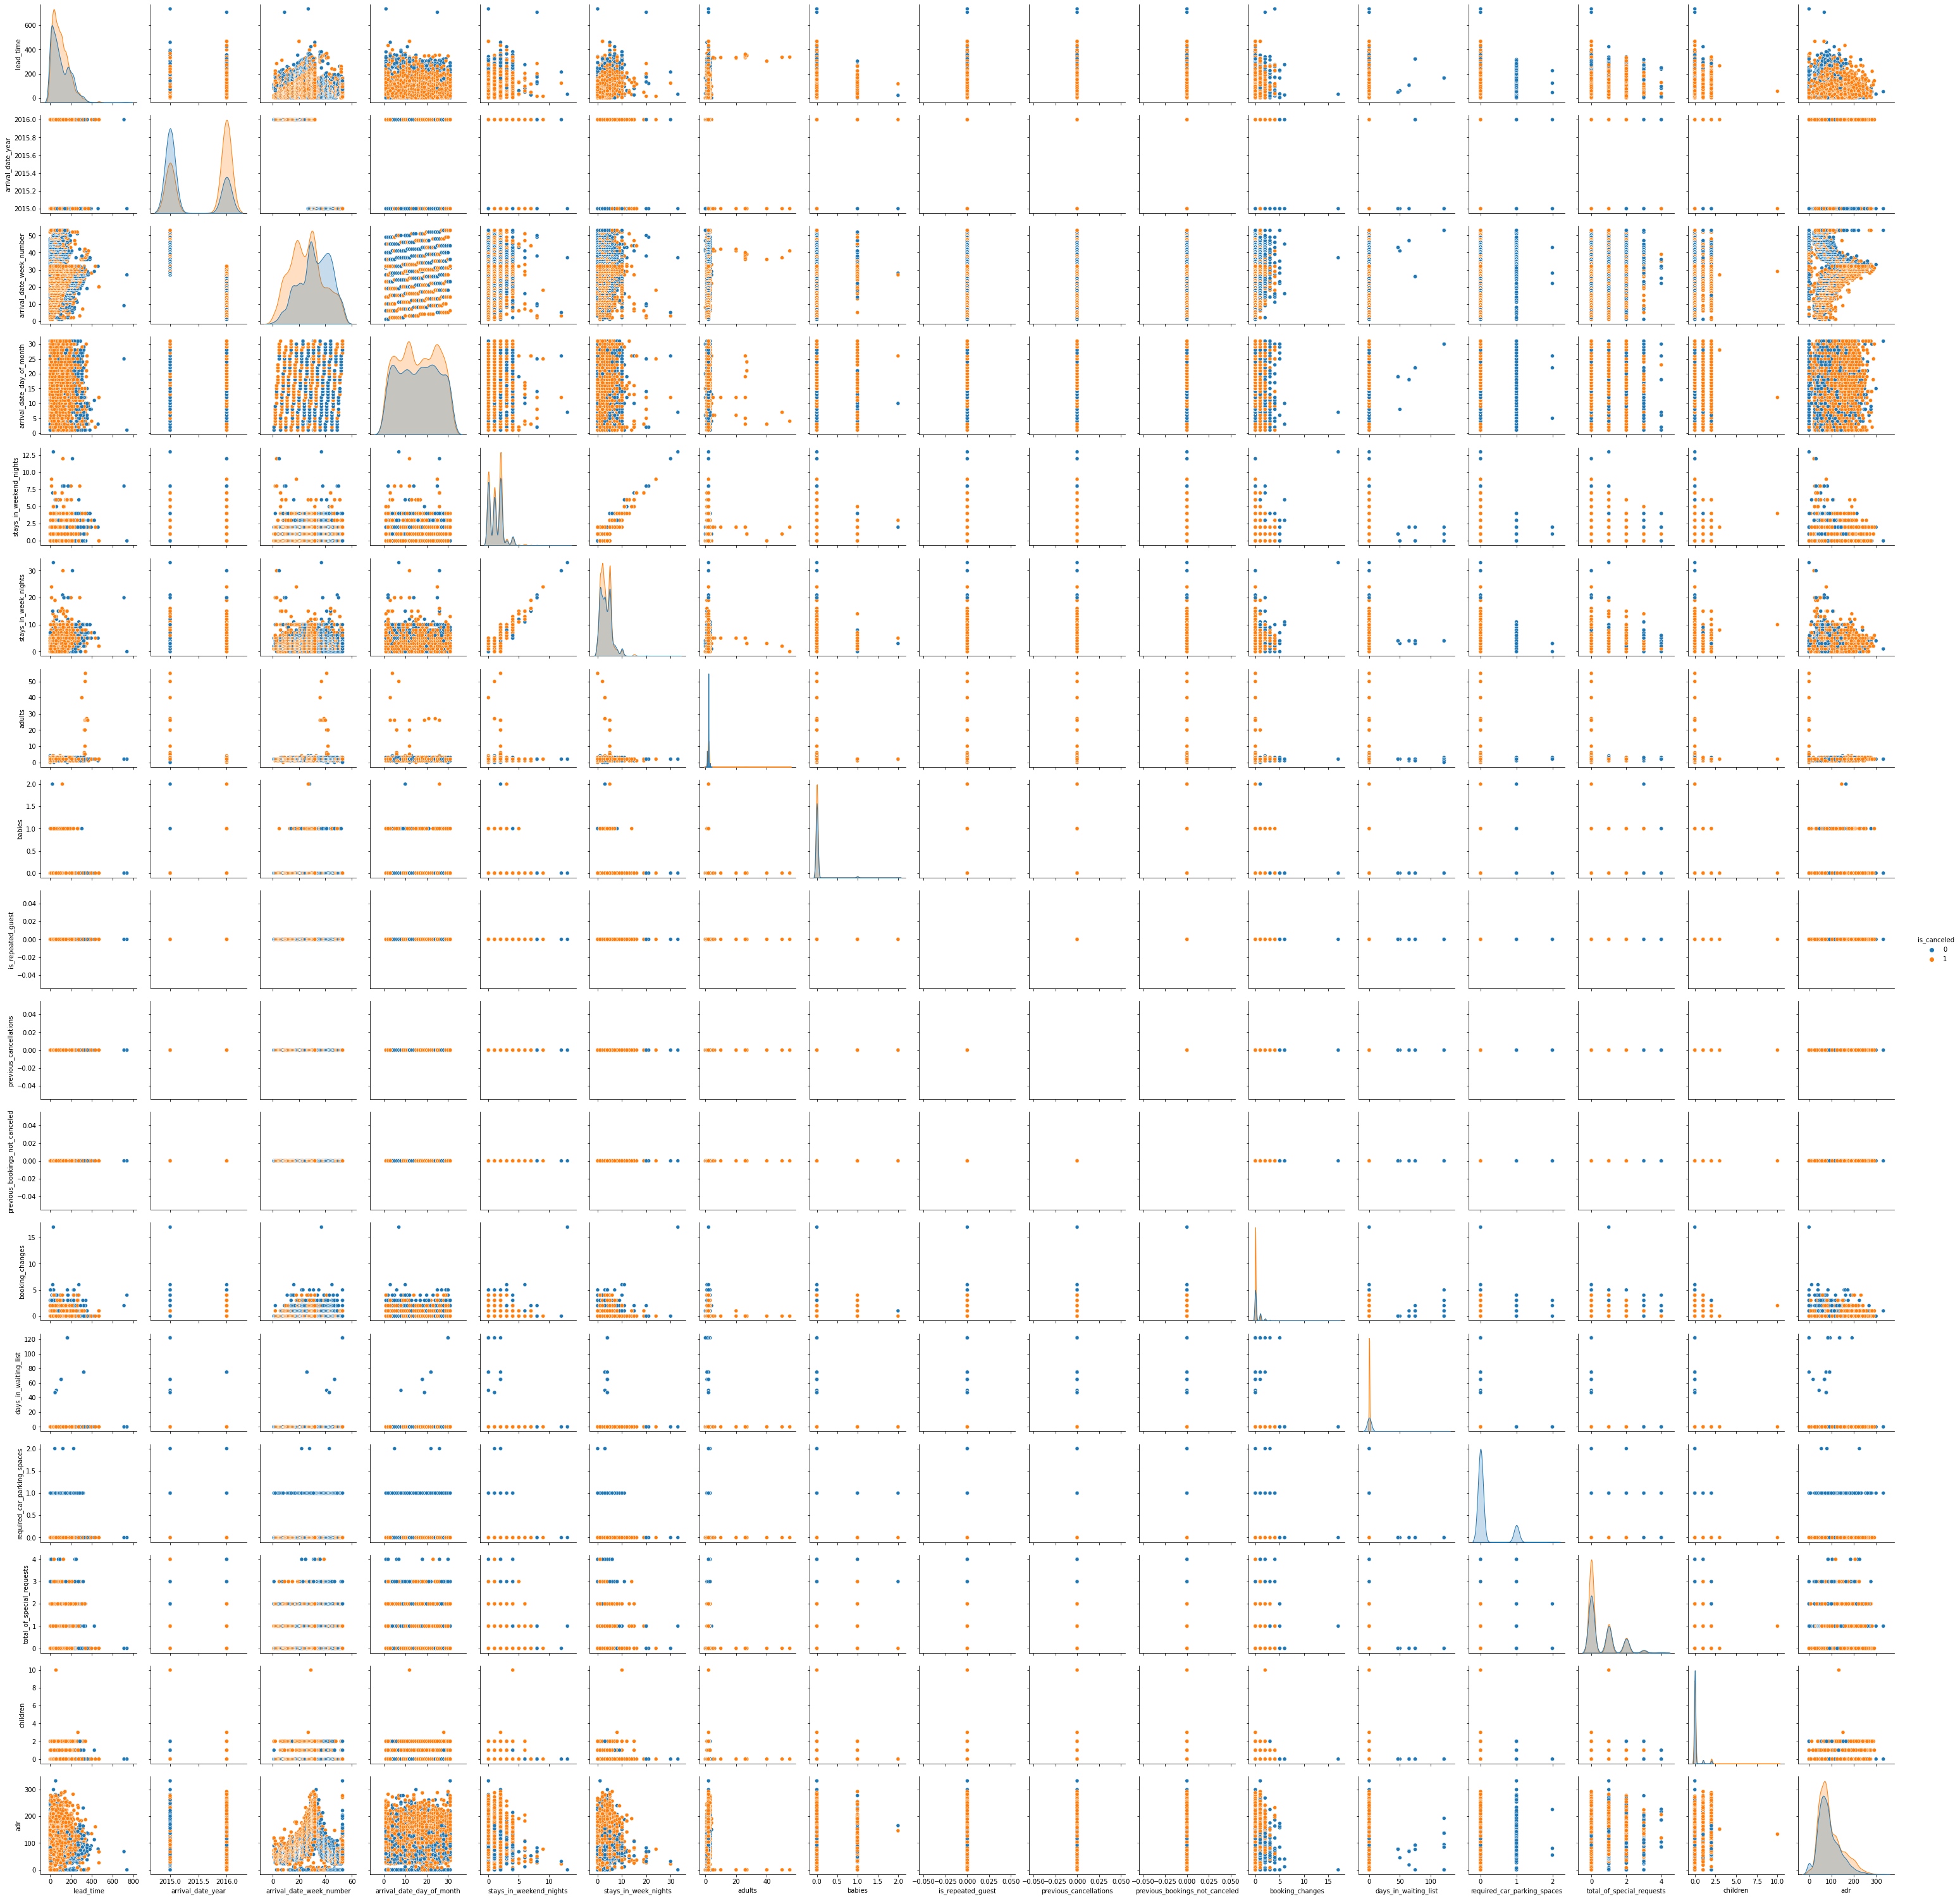

In [ ]:
sns.pairplot(numerical_df.iloc[:,:], hue="is_canceled")

## Multivariate Analyze

In [29]:
fig = px.scatter_3d(df, x = "stays_in_weekend_nights", y="stays_in_week_nights", z="adults", color="is_canceled", title="Visualization of the mutual relationship among the Night stays in week-days and weekends with the number of adults who stayed previously")
fig.show()

In [30]:
fig = px.scatter_3d(df, x = "is_repeated_guest", y="previous_cancellations", z="previous_bookings_not_canceled", color="is_canceled", title="Visualization of the mutual relationship among the Night stays in week-days and weekends with the number of adults who stayed previously")
fig.show()

In [ ]:
# replace missing values

In [31]:
def data_clean(df):
  df.fillna(0,inplace=True)
  print(df.isnull().sum())

In [32]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [34]:
list=[ 'adults', 'children', 'babies']
for i in list:
  print('{} has unique values as {}'.format(i,df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [35]:
filter=(df['adults']==0) & (df['children']==0) & (df['babies']==0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2224                       3       0  ...    No Deposit    0.0   174.0   
2409                       0       0  ...    No Deposit    0.0   174.0   
3181                       2       0  ...    No Deposit   38.0     0.0   
3684                       4       0  ...    No Deposit  308.0     0.0   
3708                       4       0  ...    No Deposit  308.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
115029                     3       0  ...    No Deposit    7.0     0.0   
115091                     1       0  ...    No Deposit    0.0     0.0   
116251                     1       0  ...    No Deposit  425.0     0.0   
116534                     5       0  ...    No Deposit    9.0     0.0   
117087                     2       0  ...    No Deposit   52.0     0.0   

       days_in_waiting_list    customer_type     adr  \
2224                      0  Transient-Party    0.00   
2409                      0        Transient    0.00   
3181                      0  Transient-Party    0.00   
3684                    122  Transient-Party    0.00   
3708                    122  Transient-Party    0.00   
...                     ...              ...     ...   
115029                    0        Transient  100.80   
115091                    0        Transient    0.00   
116251                    0        Transient   73.80   
116534                    0  Transient-Party   22.86   
117087                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
2409                              0                          0   
3181                              0         

In [36]:
data=df[~filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

## where guests come from

In [ ]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [ ]:
country_wise_data['index']

0      PRT
1      GBR
2      FRA
3      ESP
4      DEU
      ... 
161    AIA
162    PLW
163    TJK
164    SYC
165    NAM
Name: index, Length: 166, dtype: object

In [ ]:
country_wise_data.columns=['country','No of guests']
country_wise_data

country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     AIA             1
162     PLW             1
163     TJK             1
164     SYC             1
165     NAM             1

[166 rows x 2 columns]

In [ ]:
import folium

In [ ]:
basemap=folium.Map(location=[20,0], zoom_start=2)

In [ ]:
!wget https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json

--2022-01-27 07:12:03--  https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252515 (247K) [text/plain]
Saving to: ‘world-countries.json’

world-countries.jso 100%[===================>] 246.60K  --.-KB/s    in 0.005s  

2022-01-27 07:12:04 (51.7 MB/s) - ‘world-countries.json’ saved [252515/252515]



In [ ]:
import json
package =json.load(open('world-countries.json'))

In [ ]:
folium.Choropleth( 
    geo_data=package,
    name='choropleth',
    data=country_wise_data, 
    columns=['country','No of guests'], 
    key_on='feature.id', 
    fill_color='BuPu', 
    fill_opacity=1.0, 
    line_opacity=0.5, 
    legend_name='No of guests',
    highlight=True,
    ).add_to(basemap)
folium.LayerControl().add_to(basemap)
basemap

In [ ]:
# most guests come from Portugal

## variation of price depending on different factors

In [ ]:
data2=data[data['is_canceled']==0]

In [ ]:
data2.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

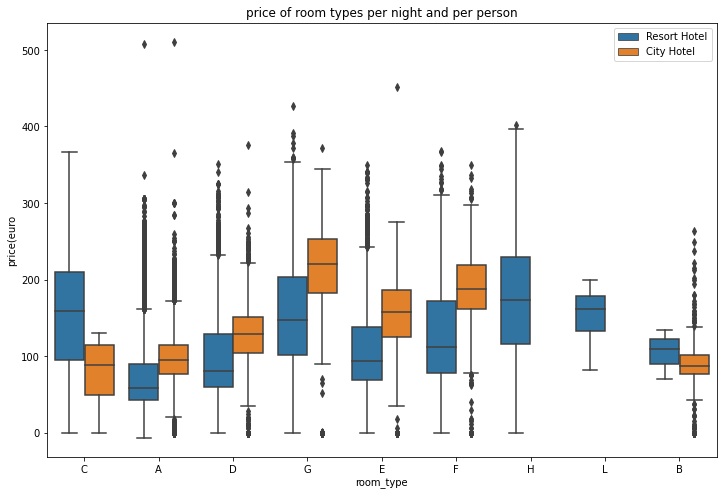

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)
plt.title('price of room types per night and per person')
plt.xlabel('room_type')
plt.ylabel('price(euro')
plt.legend()
plt.show()

In [ ]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
data_resort.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [ ]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price for resort','price for city hotel']
final

month  price for resort  price for city hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=61b5bc5c51fcc3f622b416096b6655d7c4589e60e2a1928acf656ab5a6a41ab6
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=75103604964d4de65602bc55cbf86147d5ba359f5686b8c3667f501f54166494
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
def sort_data(df,colname):
  return sd.Sort_Dataframeby_Month(df,colname)

In [ ]:
final=sort_data(final,'month')
final

month  price for resort  price for city hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

In [ ]:
final.columns

Index(['month', 'price for resort', 'price for city hotel'], dtype='object')

In [ ]:
px.line(final,x='month',y=['price for resort' , 'price for city hotel'],title='room price per night over night')

CONCLUSION - It shows resort hotel has higher price during summer and city hotels has higher price during spring and autumn

## Busiest months

In [ ]:
data_resort.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [ ]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249

In [ ]:
final_rush=rush_resort.merge(rush_city,on='month')

In [ ]:
final_rush.columns=['month','no of guests in resort','no of guest in city']
final_rush

month  no of guests in resort  no of guest in city
0      August                    3257                 5367
1        July                    3137                 4770
2     October                    2575                 4326
3       March                    2571                 4049
4       April                    2550                 4010
5         May                    2535                 4568
6    February                    2308                 3051
7   September                    2102                 4283
8        June                    2037                 4358
9    December                    2014                 2377
10   November                    1975                 2676
11    January                    1866                 2249

In [ ]:
final_rush=sort_data(final_rush,'month')
final_rush

month  no of guests in resort  no of guest in city
0     January                    1866                 2249
1    February                    2308                 3051
2       March                    2571                 4049
3       April                    2550                 4010
4         May                    2535                 4568
5        June                    2037                 4358
6        July                    3137                 4770
7      August                    3257                 5367
8   September                    2102                 4283
9     October                    2575                 4326
10   November                    1975                 2676
11   December                    2014                 2377

In [ ]:
px.line(final_rush,x='month',y=['no of guests in resort','no of guest in city'],title='total no of guests')

CONCLUSION - The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter.

## How long people stay at hotel?

In [ ]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [ ]:
clean_data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_data.head()

hotel  is_canceled  ...  reservation_status_date  total_nights
0  Resort Hotel            0  ...                 7/1/2015             0
1  Resort Hotel            0  ...                 7/1/2015             0
2  Resort Hotel            0  ...                 7/2/2015             1
3  Resort Hotel            0  ...                 7/2/2015             1
4  Resort Hotel            0  ...                 7/3/2015             2

[5 rows x 33 columns]

In [ ]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

total_nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [ ]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

total_nights         hotel  Number of stays
0             0    City Hotel              251
1             0  Resort Hotel              371
2             1    City Hotel             9155
3             1  Resort Hotel             6579
4             2    City Hotel            10983

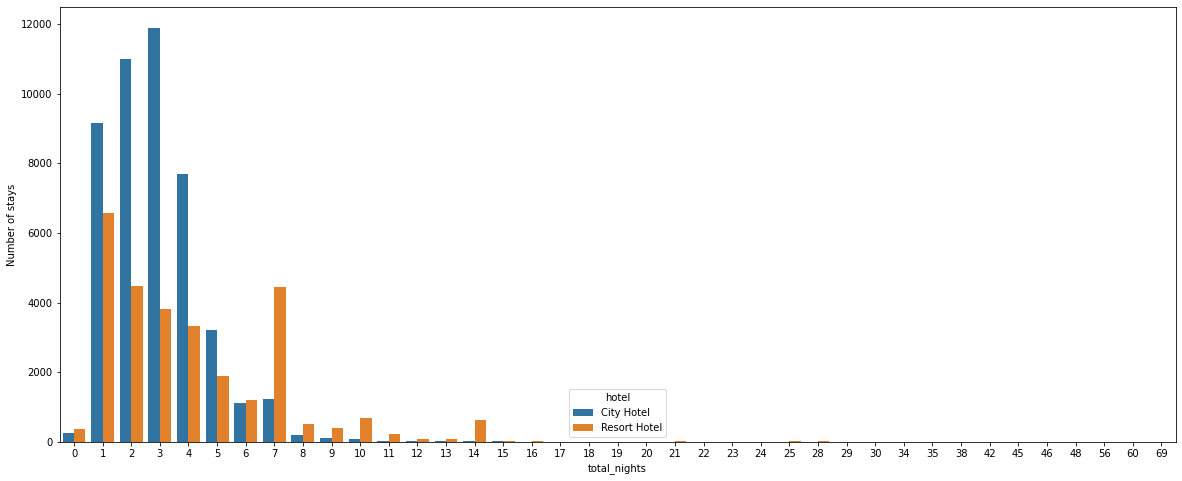

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

## Selecting important Features using Co-relation

In [40]:
data.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.292876           0.016622   
lead_time                          0.292876   1.000000           0.040334   
arrival_date_year                  0.016622   0.040334           1.000000   
arrival_date_week_number           0.008315   0.127046          -0.540373   
arrival_date_day_of_month         -0.005948   0.002306          -0.000121   
stays_in_weekend_nights           -0.001323   0.085985           0.021694   
stays_in_week_nights               0.025542   0.166892           0.031203   
adults                             0.058182   0.117575           0.030266   
children                           0.004851  -0.037878           0.054710   
babies                            -0.032569  -0.021003          -0.013192   
is_repeated_guest                 -0.083745  -0.123209           0.010281   
previous_cancellations             0.110139   0.086025          -0.119905   
previous_bookings_not_canceled    -0.057365  -0.073599           0.029234   
booking_changes                   -0.144832   0.002230           0.031416   
agent                             -0.046770  -0.013114           0.056438   
company                           -0.083594  -0.085854           0.033682   
days_in_waiting_list               0.054301   0.170008          -0.056348   
adr                                0.046492  -0.065018           0.198429   
required_car_parking_spaces       -0.195701  -0.116624          -0.013812   
total_of_special_requests         -0.234877  -0.095949           0.108610   

                                arrival_date_week_number  \
is_canceled                                     0.008315   
lead_time                                       0.127046   
arrival_date_year                              -0.540373   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066572   
stays_in_weekend_nights                         0.018629   
stays_in_week_nights                            0.016047   
adults                                          0.026567   
children                                        0.005556   
babies                                          0.010417   
is_repeated_guest                              -0.031125   
previous_cancellations                          0.035493   
previous_bookings_not_canceled                 -0.021009   
booking_changes                                 0.006311   
agent                                          -0.018225   
company                                        -0.032912   
days_in_waiting_list                            0.022677   
adr                                             0.076281   
required_car_parking_spaces                     0.001980   
total_of_special_requests                       0.026202   

                                arrival_date_day_of_month  \
is_canceled                                     -0.005948   
lead_time                                        0.002306   
arrival_date_year                               -0.000121   
arrival_date_week_number                         0.066572   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016225   
stays_in_week_nights                            -0.028362   
adults                                          -0.001754   
children                                         0.014550   
babies                                          -0.000235   
is_repeated_guest                               -0.006471   
previous_cancellations                          -0.027027   
previous_bookings_not_canceled                  -0.000306   
booking_changes                                  0.011266   
agent                                            0.000159   
company                                          0.003667   
days_in_waiting_list                             0.022532   
adr                                              0.0302

In [ ]:
co_relation=data.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [ ]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features

In [41]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [42]:
num_not=['days_in_waiting_list ','arrival_date_year ']

In [43]:
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in num_not]

In [44]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [60]:
cat_not=['arrival_date_year','assigned_room_type', 'booking_changes','reservation_status','country','days_in_waiting_list']
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [61]:
cat_features=[col for col in data.columns if data[col].dtype =='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [62]:
data_cat=data[cat_features]
data_cat

hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2                    Direct                  A   No Deposit     Transient   
3                 Corporate                  A   No Deposit     Transient   
4                     TA/TO                  A   No Deposit     Transient   
...                     ...                ...          ...           ...   
119385                TA/TO                  A   No Deposit     Transient   
119386                TA/TO                  E   No Deposit     Transient   
119387                TA/TO                  D   No Deposit     Transient   
119388                TA/TO                  A   No Deposit     Transient   
119389                TA/TO                  A   No Deposit     Transient   

       reservation_status_date  
0                     7/1/2015  
1                     7/1/2015  
2                     7/2/2015  
3                     7/2/2015  
4                     7/3/2015  
...                        ...  
119385                9/6/2017  
119386                9/7/2017  
119387                9/7/2017  
119388                9/7/2017  
119389                9/7/2017  

[119210 rows x 9 columns]

In [63]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [64]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [65]:
data_cat['year']= data_cat['reservation_status_date'].dt.year
data_cat['month']= data_cat['reservation_status_date'].dt.month
data_cat['day']= data_cat['reservation_status_date'].dt.day

In [66]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  year  \
0                  C   No Deposit     Transient              2015-07-01  2015   
1                  C   No Deposit     Transient              2015-07-01  2015   
2                  A   No Deposit     Transient              2015-07-02  2015   
3                  A   No Deposit     Transient              2015-07-02  2015   
4                  A   No Deposit     Transient              2015-07-03  2015   

   month  day  
0      7    1  
1      7    1  
2      7    2  
3      7    2  
4      7    3

In [67]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [68]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  
0                  C   No Deposit     Transient  2015      7    1  
1                  C   No Deposit     Transient  2015      7    1  
2                  A   No Deposit     Transient  2015      7    2  
3                  A   No Deposit     Transient  2015      7    2  
4                  A   No Deposit     Transient  2015      7    3

In [69]:
data_cat['cancellation']=data['is_canceled']

In [70]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  \
0                  C   No Deposit     Transient  2015      7    1   
1                  C   No Deposit     Transient  2015      7    1   
2                  A   No Deposit     Transient  2015      7    2   
3                  A   No Deposit     Transient  2015      7    2   
4                  A   No Deposit     Transient  2015      7    3   

   cancellation  
0             0  
1             0  
2             0  
3             0  
4             0

## Feature Encoding

In [71]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [72]:
for col in cols:
  print(data_cat.groupby([col])['cancellation'].mean())
  print('\n')

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserve

In [73]:
for col in cols:
  print(data_cat.groupby([col])['cancellation'].mean().to_dict())
  print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [74]:
data_cat.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  year  month  day  \
0                  C   No Deposit     Transient  2015      7    1   
1                  C   No Deposit     Transient  2015      7    1   
2                  A   No Deposit     Transient  2015      7    2   
3                  A   No Deposit     Transient  2015      7    2   
4                  A   No Deposit     Transient  2015      7    3   

   cancellation  
0             0  
1             0  
2             0  
3             0  
4             0

In [75]:
for col in cols:
  dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
  data_cat[col]=data_cat[col].map(dict)

In [ ]:
data_cat.head()

hotel  arrival_date_month      meal  ...  month  day  cancellation
0  0.277674            0.374644  0.374106  ...      7    1             0
1  0.277674            0.374644  0.374106  ...      7    1             0
2  0.277674            0.374644  0.374106  ...      7    2             0
3  0.277674            0.374644  0.374106  ...      7    2             0
4  0.277674            0.374644  0.374106  ...      7    3             0

[5 rows x 12 columns]

In [76]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [77]:
dataframe.head()

hotel  arrival_date_month      meal  market_segment  \
0  0.277674            0.374644  0.374106        0.153712   
1  0.277674            0.374644  0.374106        0.153712   
2  0.277674            0.374644  0.374106        0.153712   
3  0.277674            0.374644  0.374106        0.187618   
4  0.277674            0.374644  0.374106        0.367590   

   distribution_channel  reserved_room_type  deposit_type  customer_type  \
0              0.174868            0.330827       0.28402       0.407864   
1              0.174868            0.330827       0.28402       0.407864   
2              0.174868            0.391567       0.28402       0.407864   
3              0.220568            0.391567       0.28402       0.407864   
4              0.410598            0.391567       0.28402       0.407864   

   year  month  ...  is_repeated_guest  previous_cancellations  \
0  2015      7  ...                  0                       0   
1  2015      7  ...                  0                       0   
2  2015      7  ...                  0                       0   
3  2015      7  ...                  0                       0   
4  2015      7  ...                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    0.0      0.0   
1                               0                4    0.0      0.0   
2                               0                0    0.0      0.0   
3                               0                0  304.0      0.0   
4                               0                0  240.0      0.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 32 columns]

In [78]:
dataframe.drop(['cancellation'],axis=1,inplace=True)  

In [79]:
dataframe.shape

(119210, 31)

In [80]:
dataframe.head()

hotel  arrival_date_month      meal  market_segment  \
0  0.277674            0.374644  0.374106        0.153712   
1  0.277674            0.374644  0.374106        0.153712   
2  0.277674            0.374644  0.374106        0.153712   
3  0.277674            0.374644  0.374106        0.187618   
4  0.277674            0.374644  0.374106        0.367590   

   distribution_channel  reserved_room_type  deposit_type  customer_type  \
0              0.174868            0.330827       0.28402       0.407864   
1              0.174868            0.330827       0.28402       0.407864   
2              0.174868            0.391567       0.28402       0.407864   
3              0.220568            0.391567       0.28402       0.407864   
4              0.410598            0.391567       0.28402       0.407864   

   year  month  ...  is_repeated_guest  previous_cancellations  \
0  2015      7  ...                  0                       0   
1  2015      7  ...                  0                       0   
2  2015      7  ...                  0                       0   
3  2015      7  ...                  0                       0   
4  2015      7  ...                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    0.0      0.0   
1                               0                4    0.0      0.0   
2                               0                0    0.0      0.0   
3                               0                0  304.0      0.0   
4                               0                0  240.0      0.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 31 columns]

In [81]:
dataframe.drop('arrival_date_year',axis=1,inplace=True)

In [82]:
dataframe.shape

(119210, 30)

In [83]:
dataframe.drop('days_in_waiting_list',axis=1,inplace=True)

In [84]:
dataframe.shape

(119210, 29)

## Handle Outliers

In [85]:
def handle_outlier(col):
  dataframe[col]=np.log1p(dataframe[col])

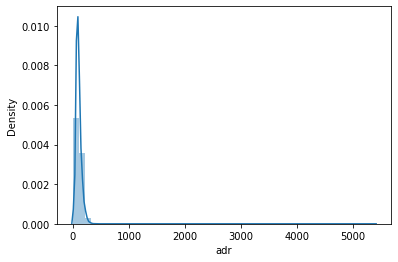

In [86]:
sns.distplot(dataframe['adr'])

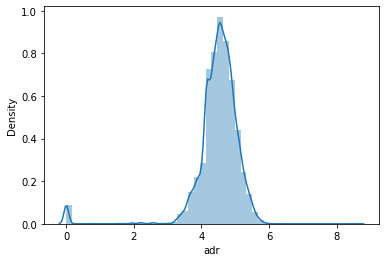

In [87]:
handle_outlier('adr')
sns.distplot(dataframe['adr'].dropna())

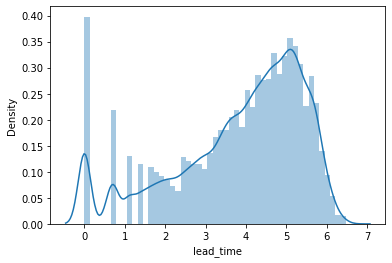

In [88]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'].dropna())

In [89]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [90]:
dataframe.dropna(inplace=True)
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces 

## Feature Importance

In [91]:
# separate dependant and independant features
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

In [92]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [93]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [94]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [95]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [96]:
cols=x.columns

In [97]:
selected_feat=cols[feature_sel_model.get_support()]

In [98]:
selected_feat

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [99]:
print('total features {}'.format(x.shape[1]))
print('total selected features {}'.format(len(selected_feat)))

total features 28
total selected features 14


In [100]:
x=x[selected_feat]
x.head()

deposit_type  year  month  day  lead_time  arrival_date_week_number  \
0       0.28402  2015      7    1   5.837730                        27   
1       0.28402  2015      7    1   6.603944                        27   
2       0.28402  2015      7    2   2.079442                        27   
3       0.28402  2015      7    2   2.639057                        27   
4       0.28402  2015      7    3   2.708050                        27   

   adults  children  previous_cancellations  booking_changes  company  \
0       2       0.0                       0                3      0.0   
1       2       0.0                       0                4      0.0   
2       1       0.0                       0                0      0.0   
3       1       0.0                       0                0      0.0   
4       2       0.0                       0                0      0.0   

        adr  required_car_parking_spaces  total_of_special_requests  
0  0.000000                            0                          0  
1  0.000000                            0                          0  
2  4.330733                            0                          0  
3  4.330733                            0                          0  
4  4.595120                            0                          1

## Splitting dataset and model building

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [103]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [104]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15315,  3477],
       [ 5244,  5767]])

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7073784518337081

## Cross validating the model

In [107]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)
score

array([0.69440483, 0.71864776, 0.70480664, 0.7306434 , 0.72644912,
       0.73433437, 0.57746833, 0.78382686, 0.72703632, 0.74387584])

In [108]:
score.mean()

0.7141493488452222

## Using other algos

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
models=[]
models.append(('LogisticRegression',logreg))
models.append(('GaussianNB',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [111]:
for name,model in models:
  print(name)
  model.fit(X_train,y_train)
  predictions=model.predict(X_test)

  print(confusion_matrix(predictions,y_test))
  print('\n')
  print(accuracy_score(predictions,y_test))
  print('\n')

LogisticRegression
[[15315  5244]
 [ 3477  5767]]


0.7073784518337081


GaussianNB
[[ 8580  1186]
 [10212  9825]]


0.6175552796698319


RandomForest
[[18641  1227]
 [  151  9784]]


0.9537630439888601


DecisionTree
[[17969   774]
 [  823 10237]]


0.9464147904573366


KNN
[[18610  1380]
 [  182  9631]]


0.9475891688756165


